24. Read csv data population.csv to Pandas data frame   

a) Draw a line plot of population of Finland over the entire time period covered in the data. Pay attention to axis, axis ticks and tick labels, figure name and axis labels.   
b) Draw a line plot of population of Nordic countries (Finland, Sweden, Norway, Denmark, Iceland) over the entire time period covered in the data. Plot all of them to the same panel, use different colors and legend to distinguish between countries.    
c) Draw a bar plot of population of India over the entire time period covered in the data.  
d) Draw stacked bar plot of population of Nordic countries. Make sure that all the countries are seen and the total height of the bar is the total Nordics population.   
e) Draw a pie chart of population of China, India and USA in the last year which appears in the data.   
f) Draw a stacked bar plot of population of European countries. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./data/population.csv')
#df

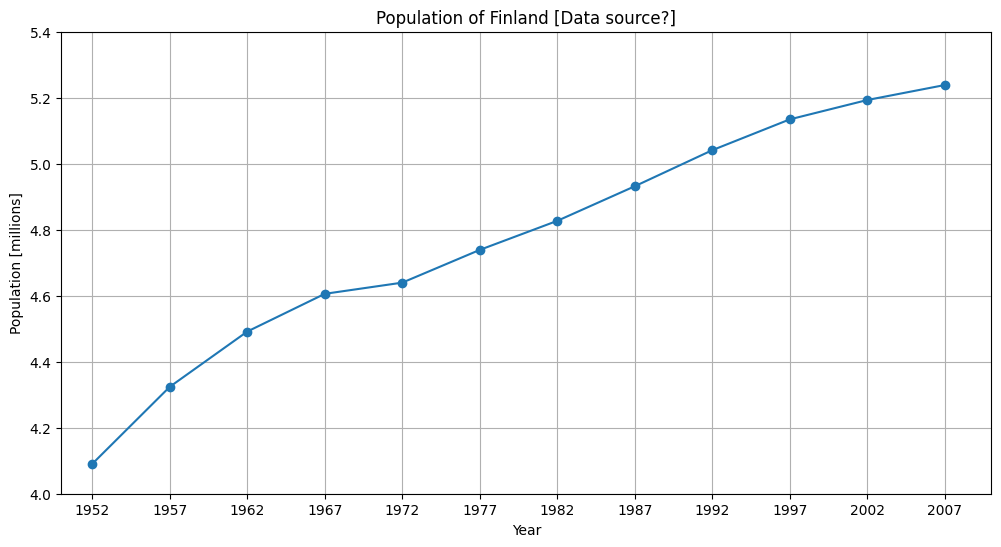

In [ ]:
#a) Draw a line plot of population of Finland over the entire time period covered in the data. 
# Pay attention to axis, axis ticks and tick labels, figure name and axis labels.

#Let's create a data frame for Finland only
df_FI = df[df['country'] == 'Finland']

#Create a figure
fig, ax = plt.subplots(figsize = (12,6),dpi = 100) #1e6 would mean ten to the power of 6
plt.plot(df_FI['year'],df_FI['pop']/1000000,'.-b',markersize = 12)
plt.axis([1950,2010,4,5.4])
ax.set_xticks(df_FI['year']) #Ticks in the same place as data points
plt.title('Population of Finland [Data source?]')
plt.ylabel('Population [millions]')
plt.xlabel('Year')
plt.grid()
plt.show() #Closes the figure, plotting after this creates a new figure

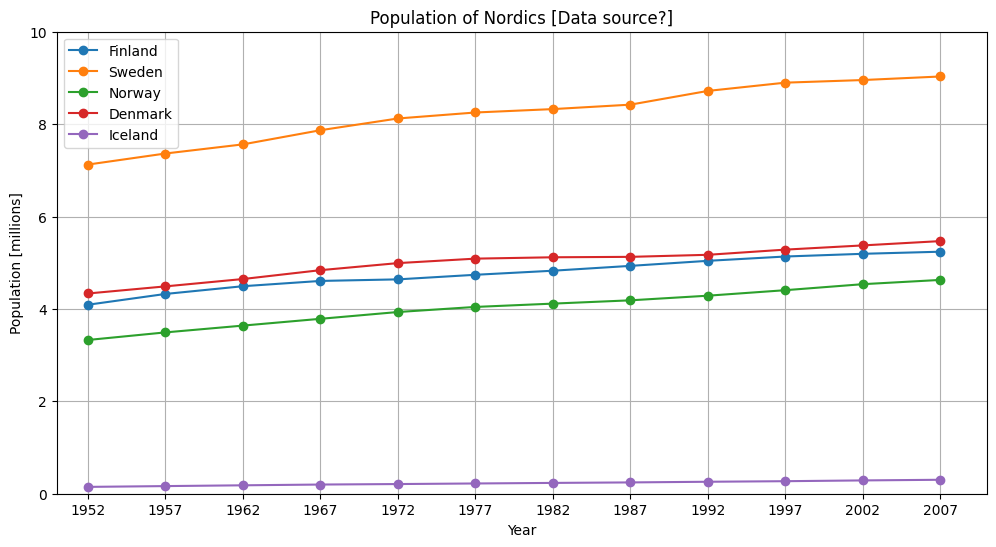

In [ ]:
#b) Draw a line plot of population of Nordic countries (Finland, Sweden, Norway, Denmark, Iceland) over the entire time period covered in the data. 
# Plot all of them to the same panel, use different colors and legend to distinguish between countries.  

#General solution, which can be easily used in case of any countries
countries = ['Finland','Sweden','Norway','Denmark','Iceland']

#Create a figure
fig, ax = plt.subplots(figsize = (12,6),dpi = 100) #1e6 would mean ten to the power of 6

for country_name in countries:
    df_plot = df[df['country'] == country_name] #select one country
    plt.plot(df_plot['year'],df_plot['pop']/1000000,'.-',markersize = 12,label = country_name) #Don't define the color

plt.axis([1950,2010,0,10])
ax.set_xticks(df_plot['year']) #Ticks in the same place as data points
plt.title('Population of Nordics [Data source?]')
plt.ylabel('Population [millions]')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.show() #Closes the figure, plotting after this creates a new figure

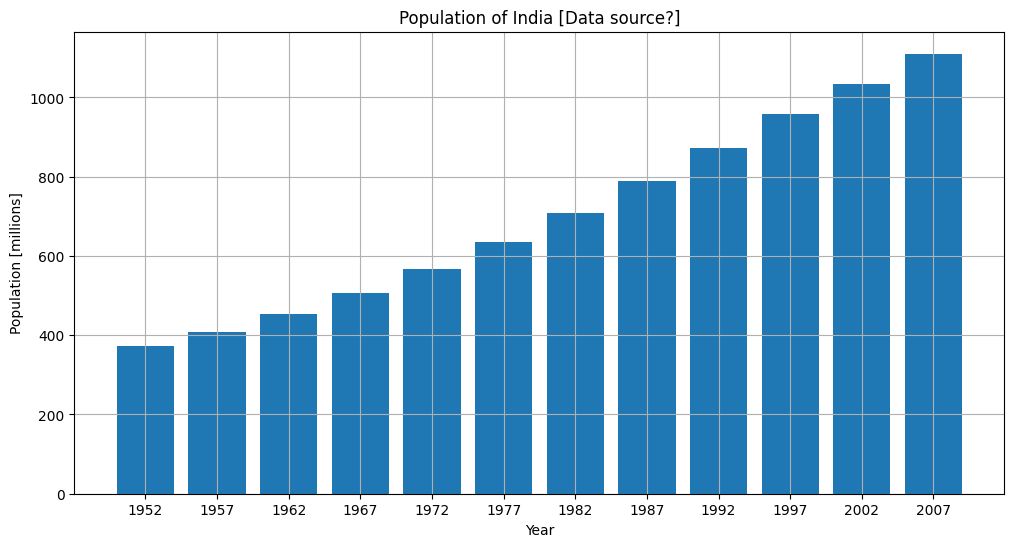

In [41]:
#c) Draw a bar plot of population of India over the entire time period covered in the data.  

#Let's create a data frame for Finland only
df_In = df[df['country'] == 'India']

#Create a figure
fig, ax = plt.subplots(figsize = (12,6),dpi = 100) #1e6 would mean ten to the power of 6
plt.bar(df_In['year'],df_In['pop']/1000000,width = 4)
#plt.axis([1950,2010,4,5.4])
ax.set_xticks(df_In['year']) #Ticks in the same place as data points
plt.title('Population of India [Data source?]')
plt.ylabel('Population [millions]')
plt.xlabel('Year')
plt.grid()
plt.show() #Closes the figure, plotting after this creates a new figure

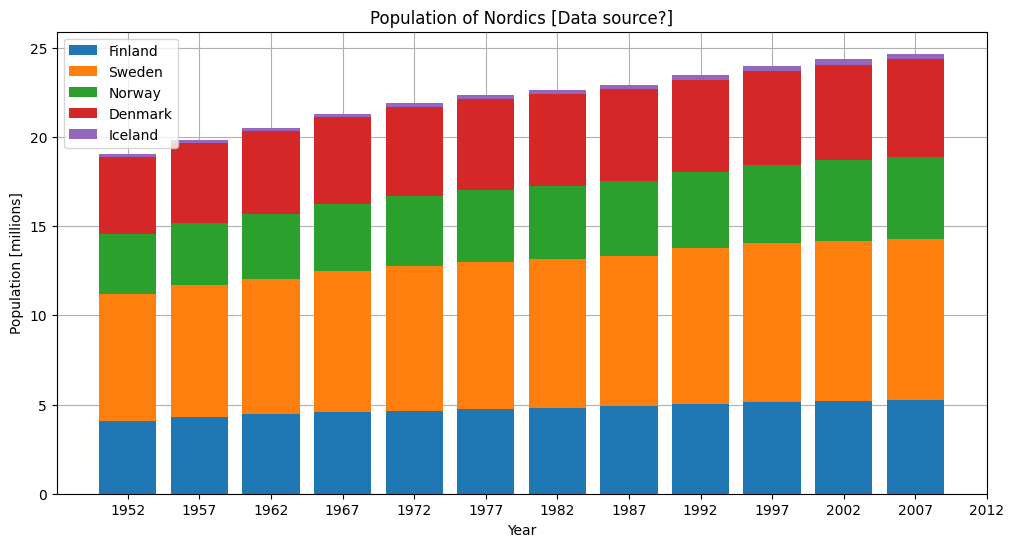

In [ ]:
#d) Draw stacked bar plot of population of Nordic countries. (The total bar height is the total population in Nordics and colors separate countries)
# Make sure that all the countries are seen and the total height of the bar is the total Nordics population. 
import numpy as np
#Create a figure
fig, ax = plt.subplots(figsize = (12,6),dpi = 100) #1e6 would mean ten to the power of 6

countries = ['Finland','Sweden','Norway','Denmark','Iceland']
bottom_line = 0 #The height where drawing the bar starts
for country_name in countries:
    df_plot = df[df['country'] == country_name] #select one country
    plt.bar(df_plot['year'],df_plot['pop']/1000000, bottom = bottom_line, width = 4,label = country_name) #Don't define the color
    #We must define that the new bar always starts from the top other earlier bars
    bottom_line = bottom_line + (df_plot['pop'].values)/1000000

#This is quite manual way to do this, there are also plotting tools for stacker plot BUT they usually require certain data structure. 

ax.set_xticks(np.arange(1952,2015,5)) #
plt.title('Population of Nordics [Data source?]')
plt.ylabel('Population [millions]')
plt.xlabel('Year')
plt.legend()
plt.grid()
ax.set_axisbelow(True)
plt.show() #Closes the figure, plotting after this creates a new figure

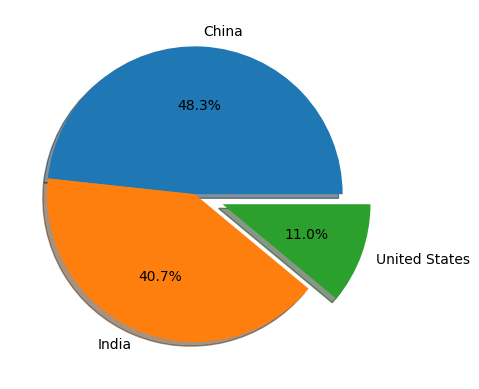

In [58]:
#e) Draw a pie chart of population of China, India and USA in the last year which appears in the data. 
#Pie chart is dummy visualization in this case. "Entire pie" should correspond to some "total value"
df_last = df[df['year'] == df['year'].max()]
df_last = df_last[df_last['country'].isin(['China','India','United States'])]

plt.pie(df_last['pop'],labels = df_last['country'],explode = (0,0,0.2),shadow=True, autopct = '%1.1f%%')
plt.show()

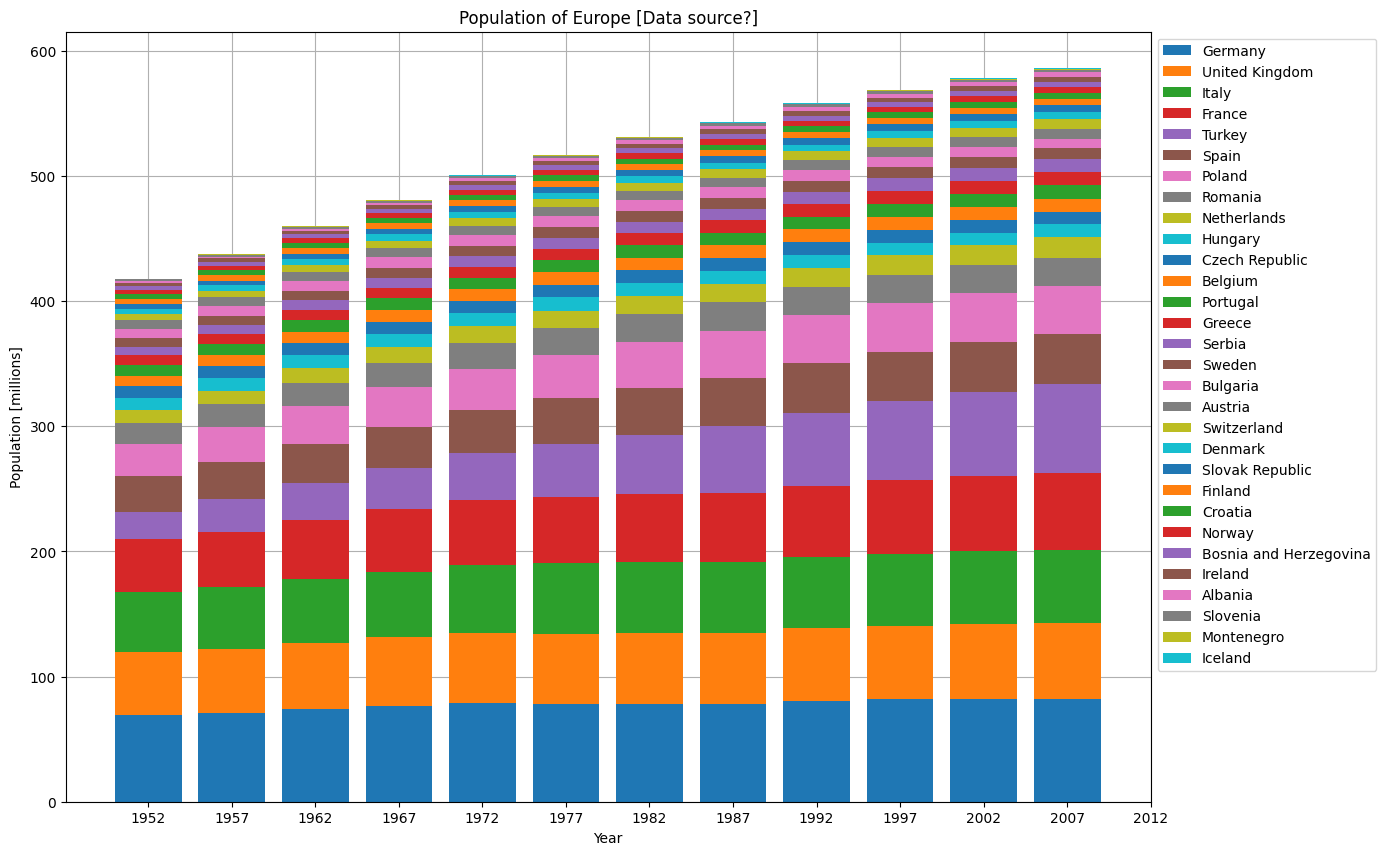

In [ ]:
#f) Draw a stacked bar plot of population of European countries. 

#Create a figure
fig, ax = plt.subplots(figsize = (14,10),dpi = 100) #1e6 would mean ten to the power of 6

df_Eur = df[df['continent'] == 'Europe']
#Calculate the average population of each country over the time frame. Note that all the countries don't appear every year!

df_pop = df_Eur.groupby(['country'],as_index=False)['pop'].mean()
df_pop = df_pop.sort_values(by = ['pop'],ascending=False)
countries = df_pop['country']

bottom_line = 0 #The height where drawing the bar starts
for country_name in countries:
    df_plot = df[df['country'] == country_name] #select one country
    plt.bar(df_plot['year'],df_plot['pop']/1000000, bottom = bottom_line, width = 4,label = country_name) #Don't define the color
    #We must define that the new bar always starts from the top other earlier bars
    bottom_line = bottom_line + (df_plot['pop'].values)/1000000

ax.set_xticks(np.arange(1952,2015,5)) #
plt.title('Population of Europe [Data source?]')
plt.ylabel('Population [millions]')
plt.xlabel('Year')
plt.legend()
ax.legend(bbox_to_anchor = (1,1))
plt.grid()
ax.set_axisbelow(True)
plt.show() #Closes the figure, plotting after this creates a new figure